In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


Accuracy: 0.9116666666666666

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7000
           1       0.86      0.72      0.78      2000

    accuracy                           0.91      9000
   macro avg       0.89      0.84      0.86      9000
weighted avg       0.91      0.91      0.91      9000

Confusion Matrix:
[[6759  241]
 [ 554 1446]]


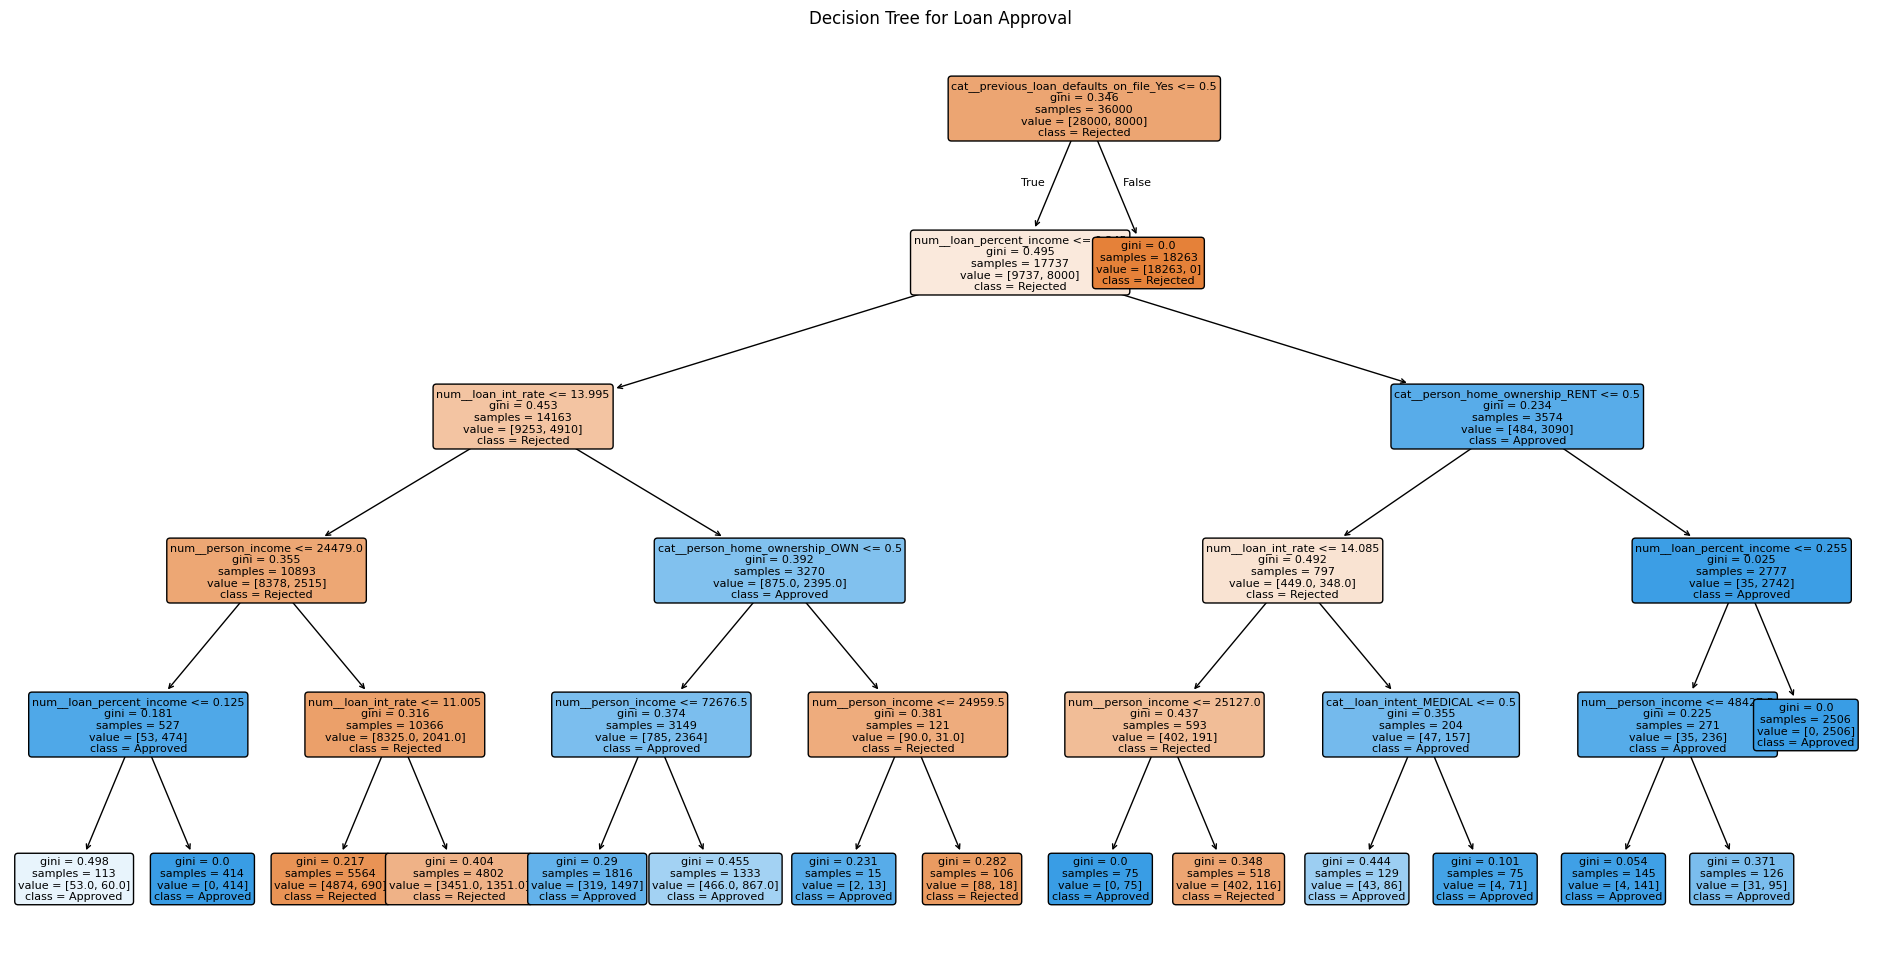


Sample Applicant Loan Decision: Approved


In [2]:
# Load and preprocess the dataset
def load_and_preprocess(file_path):
    data = pd.read_csv(file_path)

    X = data.drop("loan_status", axis=1)
    y = data["loan_status"]

    numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
    categorical_cols = X.select_dtypes(include=["object"]).columns

    numeric_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median"))
    ])

    categorical_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer([
        ("num", numeric_pipeline, numerical_cols),
        ("cat", categorical_pipeline, categorical_cols)
    ])

    return X, y, preprocessor


# Train the Decision Tree model
def train_model(X_train, y_train, preprocessor):
    model = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier(
            criterion="gini",
            max_depth=5,
            random_state=42
        ))
    ])

    model.fit(X_train, y_train)
    return model


# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


# Visualize the Decision Tree
def visualize_tree(model):
    feature_names = model.named_steps["preprocessor"].get_feature_names_out()
    class_names = ["Rejected", "Approved"]

    plt.figure(figsize=(24, 12))
    plot_tree(
        model.named_steps["classifier"],
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        fontsize=8
    )
    plt.title("Decision Tree for Loan Approval")
    plt.show()


# Predict loan approval (non-interactive, safe)
def predict_loan_status(model, user_input):
    input_df = pd.DataFrame([user_input])
    prediction = model.predict(input_df)[0]
    return "Approved" if prediction == 1 else "Rejected"


# Main program
def main():
    file_path = "data.csv"

    X, y, preprocessor = load_and_preprocess(file_path)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    model = train_model(X_train, y_train, preprocessor)

    evaluate_model(model, X_test, y_test)

    visualize_tree(model)

    # Example prediction (no input(), safe for grading)
    sample_applicant = {
        "person_age": 30,
        "person_gender": "male",
        "person_education": "Bachelor",
        "person_income": 60000,
        "person_emp_exp": 5,
        "person_home_ownership": "RENT",
        "loan_amnt": 15000,
        "loan_intent": "PERSONAL",
        "loan_int_rate": 12.5,
        "loan_percent_income": 0.25,
        "cb_person_cred_hist_length": 6,
        "credit_score": 680,
        "previous_loan_defaults_on_file": "No"
    }

    result = predict_loan_status(model, sample_applicant)
    print("\nSample Applicant Loan Decision:", result)


if __name__ == "__main__":
    main()
